In [2]:
import seaborn as sns
import pandas as pd
import libpysal as ps
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
arts_centers = pd.read_csv('data/Arts_centres.csv')
arts_count = arts_centers['ward_2018_code'].value_counts().reset_index()
arts_count.columns = ['ward', 'arts_count']

cinemas = pd.read_csv('data/Cinemas.csv')
cinemas_count = cinemas['ward_2018_code'].value_counts().reset_index()
cinemas_count.columns = ['ward', 'cinema_count']

galleries = pd.read_csv('data/Commercial_galleries.csv')
gallery_count = galleries['ward_2018_code'].value_counts().reset_index()
gallery_count.columns = ['ward', 'gallery_count']

comm_centre = pd.read_csv('data/Community_centres.csv')
comm_centre_count = comm_centre['ward_2018_code'].value_counts().reset_index()
comm_centre_count.columns = ['ward', 'comm_center_count']

dance = pd.read_csv('data/Dance_performance_venues.csv')
dance_count = dance['ward_2018_code'].value_counts().reset_index()
dance_count.columns = ['ward', 'dance_count']

lgbt = pd.read_csv('data/LGBT_night_time_venues.csv')
lgbt_count = lgbt['ward_2018_code'].value_counts().reset_index()
lgbt_count.columns = ['ward', 'lgbt_count']

libraries = pd.read_csv('data/Libraries.csv')
library_count = libraries['ward_2018_code'].value_counts().reset_index()
library_count.columns = ['ward', 'library_count']

museums = pd.read_csv('data/Museums_and_public_galleries.csv')
museum_count = museums['ward_2018_code'].value_counts().reset_index()
museum_count.columns = ['ward', 'museum_count']

music = pd.read_csv('data/Music_venues_all.csv')
music_count = music['ward_2018_code'].value_counts().reset_index()
music_count.columns = ['ward', 'music_count']

outdoor = pd.read_csv('data/Outdoor_spaces_for_cultural_use.csv')
outdoor_count = outdoor['ward_2018_code'].value_counts().reset_index()
outdoor_count.columns = ['ward', 'outdoor_count']

pubs = pd.read_csv('data/Pubs.csv')
pub_count = pubs['ward_2018_code'].value_counts().reset_index()
pub_count.columns = ['ward', 'pub_count']

skate = pd.read_csv('data/Skate_Parks.csv')
skate_count = skate['ward_2018_code'].value_counts().reset_index()
skate_count.columns = ['ward', 'skate_count']

theatres = pd.read_csv('data/Theatres.csv')
theatre_count = theatres['ward_2018_code'].value_counts().reset_index()
theatre_count.columns = ['ward', 'theatre_count']

In [5]:
london = gpd.read_file('shapefiles/London-wards-2018/ESRI/London_Ward.shp')
london.set_index('GSS_CODE')
london = london.merge(arts_count, left_on='GSS_CODE', right_on='ward', how='left')
london = london.merge(cinemas_count, left_on='GSS_CODE', right_on='ward', how='left')
london = london.merge(gallery_count, left_on='GSS_CODE', right_on='ward', how='left')
london = london.merge(comm_centre_count, left_on='GSS_CODE', right_on='ward', how='left')
london = london.merge(dance_count, left_on='GSS_CODE', right_on='ward', how='left')
london = london.merge(lgbt_count, left_on='GSS_CODE', right_on='ward', how='left')
london = london.merge(library_count, left_on='GSS_CODE', right_on='ward', how='left')
london = london.merge(museum_count, left_on='GSS_CODE', right_on='ward', how='left')
london = london.merge(music_count, left_on='GSS_CODE', right_on='ward', how='left')
london = london.merge(outdoor_count, left_on='GSS_CODE', right_on='ward', how='left')
london = london.merge(pub_count, left_on='GSS_CODE', right_on='ward', how='left')
london = london.merge(skate_count, left_on='GSS_CODE', right_on='ward', how='left')
london = london.merge(theatre_count, left_on='GSS_CODE', right_on='ward', how='left')

london = london[['NAME', 'GSS_CODE', 'DISTRICT', 'LAGSSCODE', 'geometry', 
    'arts_count', 'cinema_count', 'gallery_count', 'comm_center_count', 
    'dance_count', 'lgbt_count', 'library_count', 'museum_count', 
    'music_count', 'outdoor_count', 'pub_count', 'skate_count', 'theatre_count']]
london = london.fillna(0)
london['total_count'] = london['arts_count'] + london['cinema_count'] + london['gallery_count'] + london['comm_center_count'] + london['dance_count'] + london['lgbt_count'] + london['library_count'] + london['museum_count'] + london['music_count'] + london['outdoor_count'] + london['pub_count'] + london['skate_count'] + london['theatre_count']

KeyError: "None of ['GSS_CODE'] are in the columns"

In [ ]:
london.keys()

Index(['NAME', 'GSS_CODE', 'DISTRICT', 'LAGSSCODE', 'geometry', 'arts_count',
       'cinema_count', 'gallery_count', 'comm_center_count', 'dance_count',
       'lgbt_count', 'library_count', 'museum_count', 'music_count',
       'outdoor_count', 'pub_count', 'skate_count', 'theatre_count',
       'total_count'],
      dtype='object')

In [ ]:
london

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,geometry,arts_count,cinema_count,gallery_count,comm_center_count,dance_count,lgbt_count,library_count,museum_count,music_count,outdoor_count,pub_count,skate_count,theatre_count,total_count
0,Chessington South,E05000405,Kingston upon Thames,E09000021,"POLYGON ((516401.596 160201.802, 516407.302 16...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,"POLYGON ((519552.998 164295.600, 519508.096 16...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,Berrylands,E05000401,Kingston upon Thames,E09000021,"POLYGON ((518107.499 167303.399, 518114.301 16...",0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,0.0,8.0
3,Alexandra,E05000400,Kingston upon Thames,E09000021,"POLYGON ((520336.700 165105.498, 520332.198 16...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,Beverley,E05000402,Kingston upon Thames,E09000021,"POLYGON ((521201.203 169275.505, 521204.303 16...",0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,Aldgate,E05009289,City and County of the City of London,E09000001,"POLYGON ((533315.597 180988.802, 533305.703 18...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,13.0,0.0,0.0,16.0
653,Broad Street,E05009295,City and County of the City of London,E09000001,"POLYGON ((533005.698 181612.203, 533099.098 18...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,8.0
654,Coleman Street,E05009299,City and County of the City of London,E09000001,"POLYGON ((532552.797 181289.396, 532554.198 18...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,12.0,0.0,0.0,16.0
655,Portsoken,E05009308,City and County of the City of London,E09000001,"POLYGON ((533814.299 180968.898, 533757.202 18...",0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0


<AxesSubplot: >

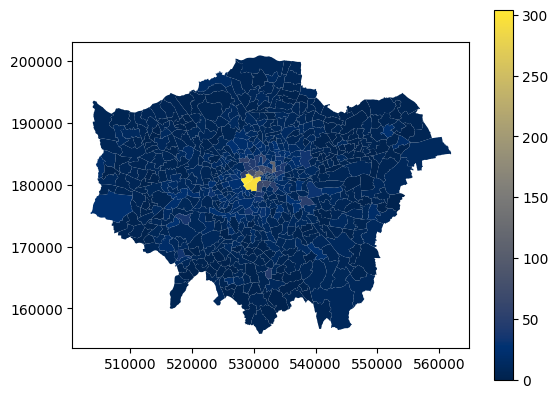

In [ ]:
london.plot(
    column='total_count', 
    legend=True,
    cmap='cividis',
    missing_kwds={
        "color": "lightgrey",
        # "edgecolor": "black",
        "label": "Missing values",
    })